## <CENTER>SUPER STORE DATA ANALYSYS AND PREDICTION

##### About Dataset
###### Context
Retail dataset of a global superstore for 4 years.
Perform EDA and Predict the sales of the next 3 months from the last date of the Training dataset!

###### Content
Time series analysis deals with time series based data to extract patterns for predictions and other characteristics of the data. It uses a model for forecasting future values in a small time frame based on previous observations. It is widely used for non-stationary data, such as economic data, weather data, stock prices, and retail sales forecasting.



In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import klib as k
import plotly.express as plx
import matplotlib.ticker as ticker
import itertools


In [2]:
#importing dataset
data=pd.read_csv('./supermarket.csv')

In [3]:
data.head()

,Row ID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
data.shape

(9800, 18)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
PostalCode,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9800 non-null   int64  
 1   OrderID       9800 non-null   object 
 2   OrderDate     9800 non-null   object 
 3   ShipDate      9800 non-null   object 
 4   ShipMode      9800 non-null   object 
 5   CustomerID    9800 non-null   object 
 6   CustomerName  9800 non-null   object 
 7   Segment       9800 non-null   object 
 8   Country       9800 non-null   object 
 9   City          9800 non-null   object 
 10  State         9800 non-null   object 
 11  PostalCode    9789 non-null   float64
 12  Region        9800 non-null   object 
 13  ProductID     9800 non-null   object 
 14  Category      9800 non-null   object 
 15  SubCategory   9800 non-null   object 
 16  ProductName   9800 non-null   object 
 17  Sales         9800 non-null   float64
dtypes: float64(2), int64(1), obj

### converting data types of columns

In [7]:
data[['OrderDate','ShipDate']]=data[['OrderDate','ShipDate']].apply(pd.to_datetime)

In [8]:
data['PostalCode']=data['PostalCode'].astype(str)

## EDA

In [9]:
#checking null vulues
data.isnull().mean()*100

Row ID          0.0
OrderID         0.0
OrderDate       0.0
ShipDate        0.0
ShipMode        0.0
CustomerID      0.0
CustomerName    0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
PostalCode      0.0
Region          0.0
ProductID       0.0
Category        0.0
SubCategory     0.0
ProductName     0.0
Sales           0.0
dtype: float64

In [10]:
#detecting duplicates
data.duplicated().sum()

0

#### Identifying column unique values and analysing

In [11]:
data.ShipMode.unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [12]:
data.ShipMode.value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: ShipMode, dtype: int64

ship mode are classified into 4 types and most customer chose standard class delivery

In [13]:
data.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [14]:
data.Segment.value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

in the data customers are segmented into three types, consumer segment has bought more products

In [15]:
data.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [16]:
data.Category.value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

product catogories are classified into 3 types, office supplies are the most spold catogory

In [17]:
data.Country.unique()

array(['United States'], dtype=object)

The sales are only in unitedstates

In [18]:
data.SubCategory.unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [19]:
data.SubCategory.value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: SubCategory, dtype: int64

Binders and papers are the most sold items

In [20]:
data.CustomerName.value_counts()

William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Anthony O'Donnell       1
Name: CustomerName, Length: 793, dtype: int64

We can see william brown,matt abelman,paul prost,john lee,chloris kastensmidth are the most purchased customers

In [21]:
data.State.value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

MOST PRODUCT SOLD IN CALIFORNIA,NEW YORK,TEXAS STATE AND LEAST SALES FROM WYOMING

In [22]:
data.City.value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64

NEW YORK CITY,LOS ANGELES CITY HAS MORE SALES AND LEAST SALES FROM SPRINGDALE,MELBOURNE,CONWAY,CHEYENNE,SAN MATEO


## Convert date time into year,month,day

In [23]:
#creating new column by converting orderdate into year,month,day.
data['year']=data['OrderDate'].dt.year

In [24]:
data['month']=data['OrderDate'].dt.month

In [25]:
data['day']=data['OrderDate'].dt.day

# UNI VARIATE ANALYSIS

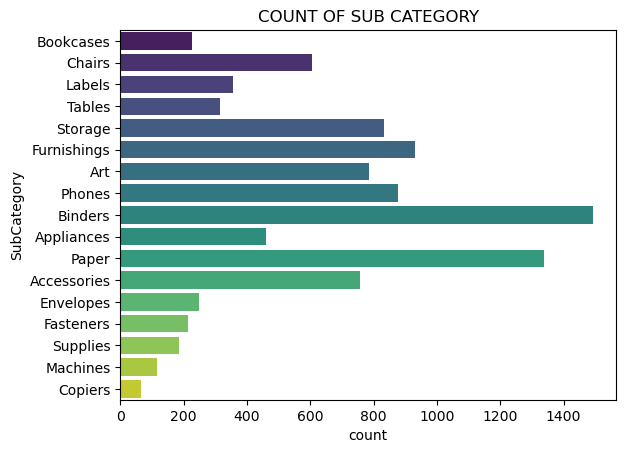

In [58]:
sns.countplot(data=data,y='SubCategory',palette='viridis')
plt.title('COUNT OF SUB CATEGORY')
plt.show()

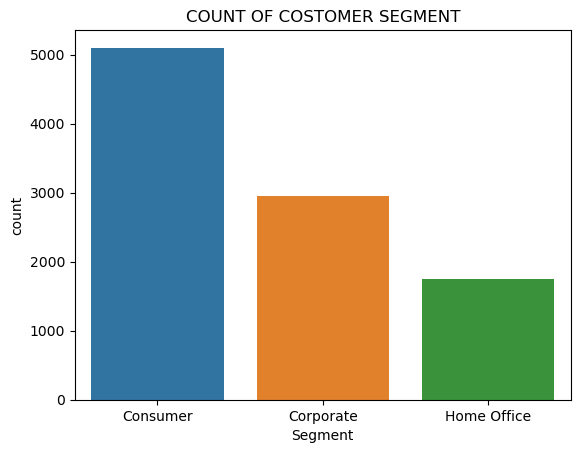

In [27]:
sns.countplot(data=data,x='Segment')
plt.title('COUNT OF COSTOMER SEGMENT')
plt.show()

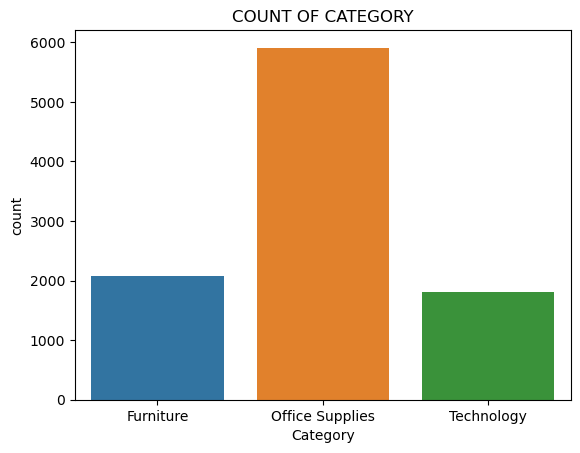

In [28]:
sns.countplot(data=data,x='Category')
plt.title('COUNT OF CATEGORY')
plt.show()

<AxesSubplot:xlabel='count', ylabel='State'>

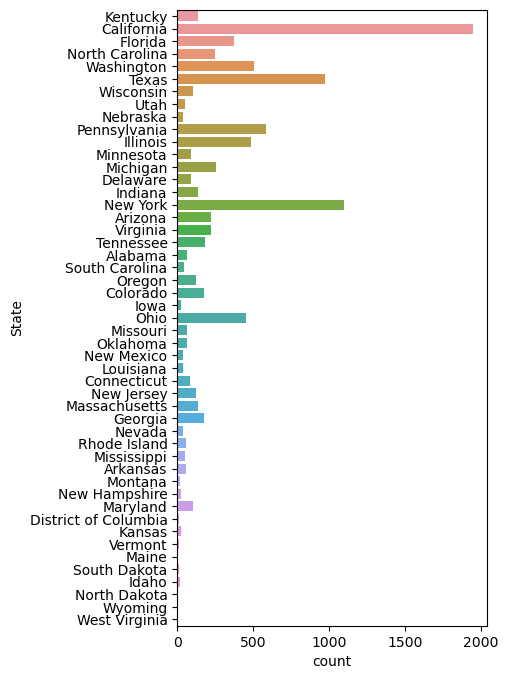

In [29]:
plt.figure(figsize=[4,8])
sns.countplot(data=data,y='State')

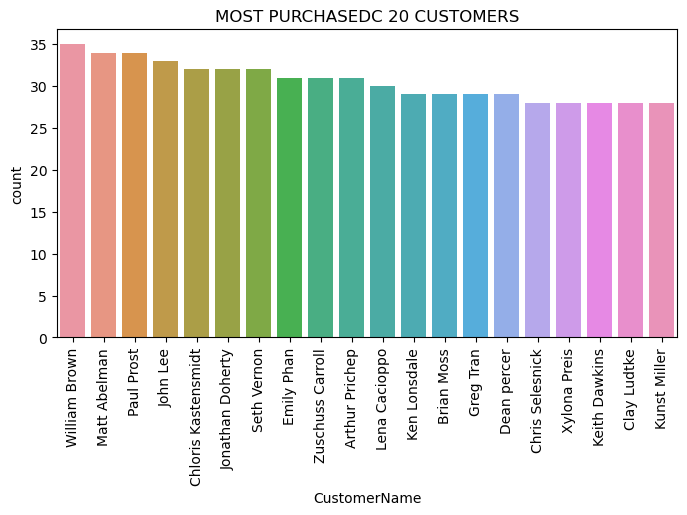

In [30]:
plt.figure(figsize=[8,4])
top_10_customers = data['CustomerName'].value_counts().head(20)
sns.countplot(data=data,x='CustomerName',order=top_10_customers.index)
plt.title("MOST PURCHASEDC 20 CUSTOMERS")
plt.xticks(rotation=90)

plt.show()

# MULTI VARIATE ANALYSIS

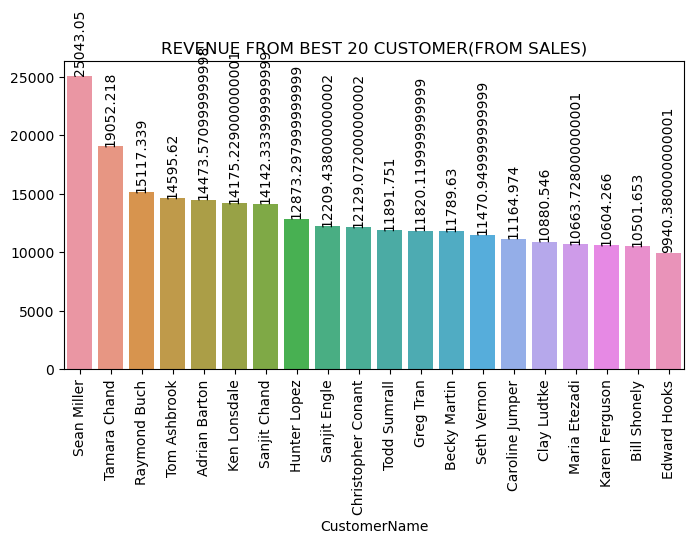

In [31]:
plt.figure(figsize=[8, 4])
top_20_customers = data.groupby('CustomerName')['Sales'].sum().nlargest(20)
sns.barplot(x=top_20_customers.index, y=top_20_customers.values)
plt.title("REVENUE FROM BEST 20 CUSTOMER(FROM SALES)")
plt.xticks(rotation=90)

for i, v in enumerate(top_20_customers.values):
    plt.text(i, v, str(v), ha='center', va='bottom',rotation=90)
    
plt.show()


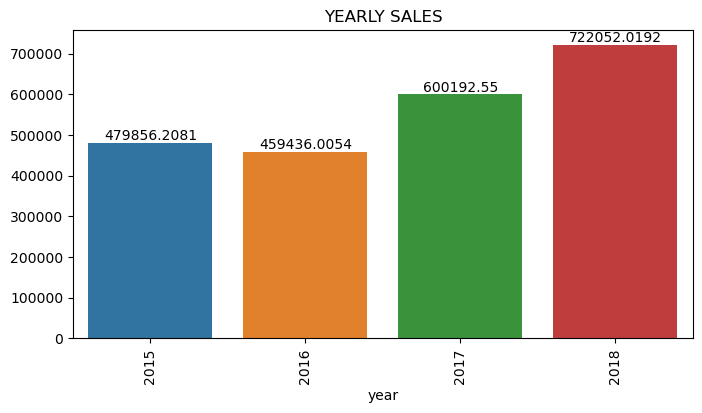

In [32]:
plt.figure(figsize=[8, 4])
year_wise_sales = data.groupby('year')['Sales'].sum()
sns.barplot(x=year_wise_sales.index, y=year_wise_sales.values)
plt.title("YEARLY SALES")
plt.xticks(rotation=90)

for i, v in enumerate(year_wise_sales.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()


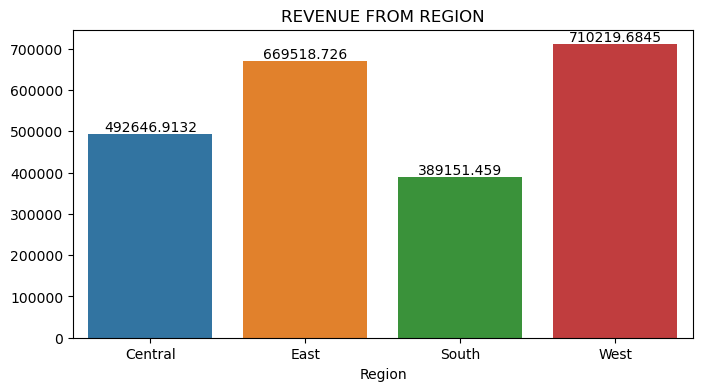

In [33]:
plt.figure(figsize=[8, 4])
regional_sales = data.groupby('Region')['Sales'].sum()
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title("REVENUE FROM REGION")

for i, v in enumerate(regional_sales.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

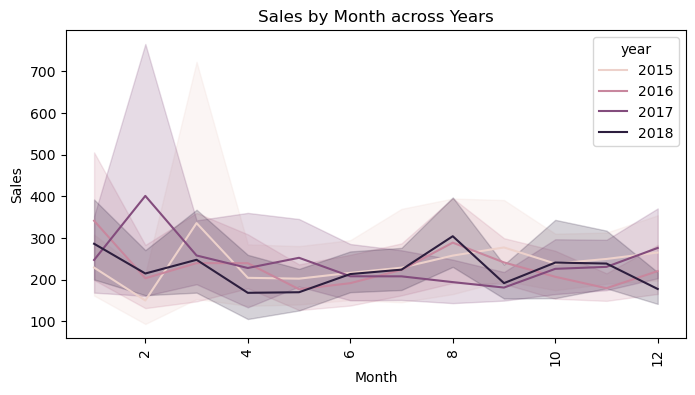

In [34]:
plt.figure(figsize=[8, 4])
sns.lineplot(data=data, x='month', y='Sales', hue='year')
plt.title("Sales by Month across Years")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

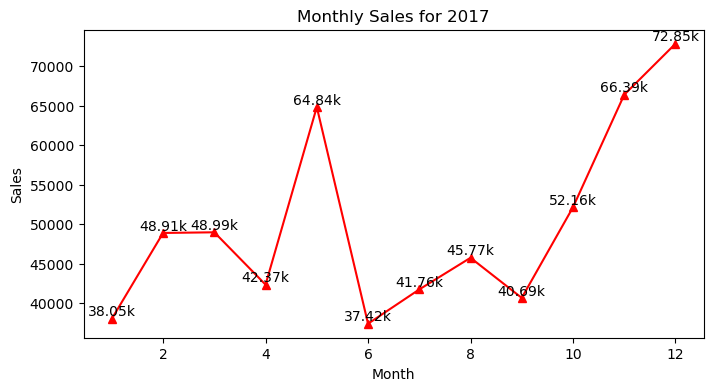

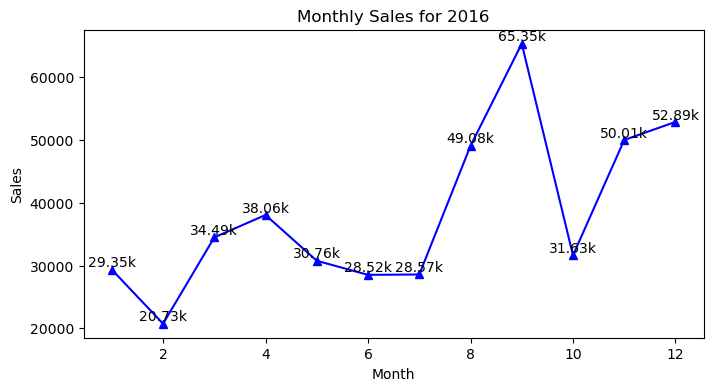

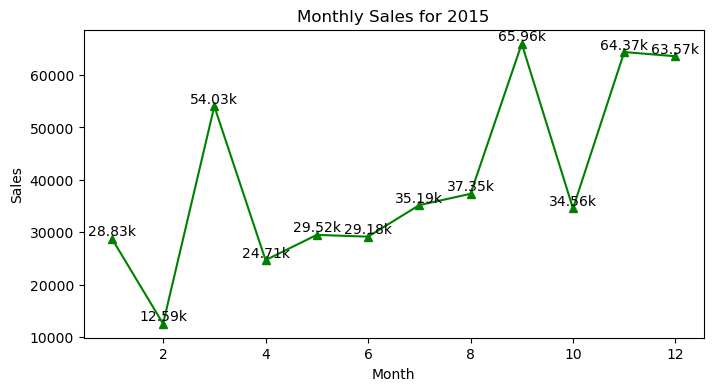

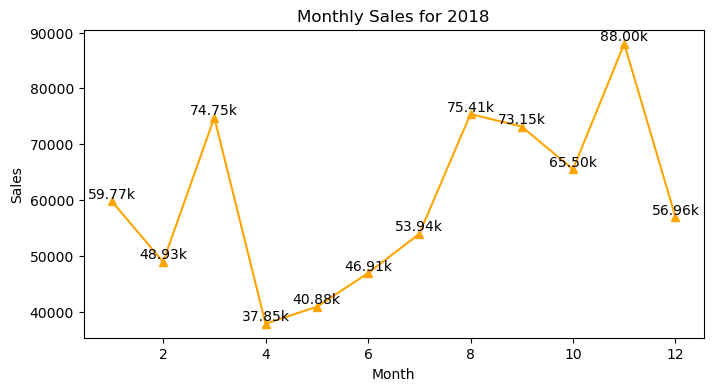

In [35]:
years = data['year'].unique()
colors = itertools.cycle(['red', 'blue', 'green', 'orange'])#assigning colours

for year in years:
    plt.figure(figsize=(8, 4))
    year_data = data[data['year'] == year]
    monthly_sales = year_data.groupby('month')['Sales'].sum()
    months = monthly_sales.index
    
    color = next(colors)
    plt.plot(months, monthly_sales,color=color,marker = '^')
    plt.title(f"Monthly Sales for {year}")
    plt.xlabel("Month")
    plt.ylabel("Sales")
    
     # Add annotations
    for x, y in zip(months, monthly_sales):
        formatter = ticker.StrMethodFormatter("{x:.2f}k")
        plt.text(x, y, formatter(y / 1000), ha='center', va='bottom')
        
    plt.show()


In [67]:
pivot_by_month = data.pivot_table(index='year',
 columns='ShipMode',
 values='Sales', 
 aggfunc=len,
 fill_value=0)

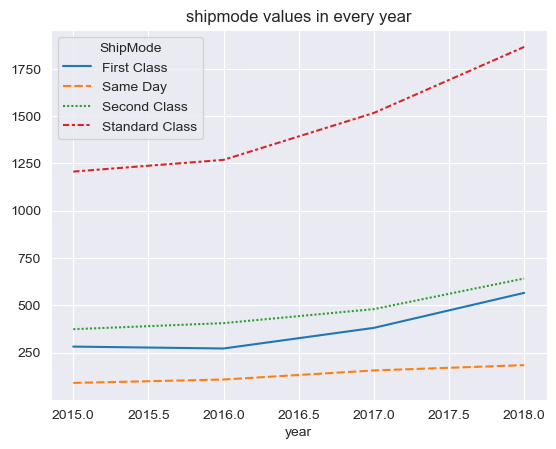

In [72]:
sns.lineplot(data=pivot_by_month)
plt.title('shipmode values in every year')
sns.set_style('darkgrid')


WE CAN CLEARLY IDENTIYFY A STRONG UPWARD TREND IN USAGE OF STANDARD CLASS DELIVERY MODE. AFTER 2016 THERE IS A SIGNIFICANT HIKE IN STANDARD CLASS DELIVERY.
IN THE CASE OF SAME DAY DELIVERY THE LEVEL IS STABLE AND NO QUICK MOVEMENT HAPPENED.
FIRST CLAS SAND SECOND CLASS DELIVERY HAS A LITTLE UPWARD HIKE AFTER 2016. THOSE MODES DOUBLED THEIR VALUES IN 2018

# <CENTER> USING SARIMA MODEL TO FORECAST SALES

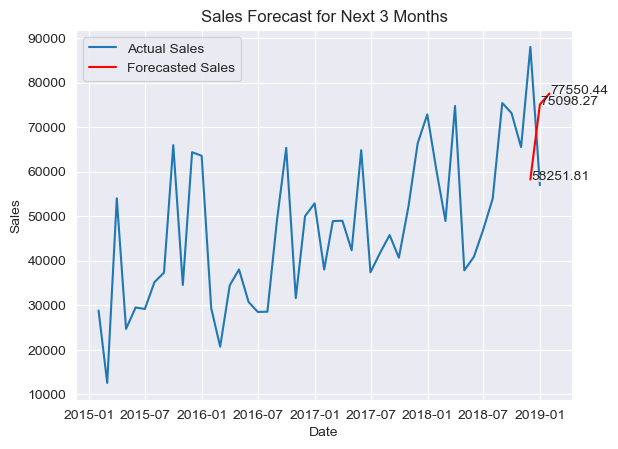

In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

data['OrderDate'] = pd.to_datetime(data['OrderDate'])

# Aggregate sales data to monthly level
monthly_sales = data.groupby(pd.Grouper(key='OrderDate', freq='M')).sum()['Sales']

# Split the data into training and testing sets
train_data = monthly_sales.iloc[:-3]  # Use all except the last 3 months for training
test_data = monthly_sales.iloc[-3:]   # Use the last 3 months for testing

# Fit SARIMA model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecast sales for the next 3 months
forecast = model_fit.forecast(steps=3)

# Create a new DataFrame for the forecasted sales
forecast_dates = pd.date_range(start=test_data.index[0] + pd.DateOffset(months=1), periods=3, freq='M')
forecast_data = pd.DataFrame({'OrderDate': forecast_dates, 'Sales': forecast})

# Concatenate the original sales data with the forecasted sales data
combined_data = pd.concat([monthly_sales, forecast_data.set_index('OrderDate')])

# Plot the actual and forecasted sales
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales')
plt.plot(forecast_data['OrderDate'], forecast_data['Sales'], color='red', label='Forecasted Sales')

for i in range(len(forecast_data)):
    plt.annotate(f'{forecast[i]:.2f}', xy=(forecast_data['OrderDate'][i], forecast_data['Sales'][i]),
                 xytext=(forecast_data['OrderDate'][i] + pd.DateOffset(days=3), forecast_data['Sales'][i]),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for Next 3 Months')
plt.legend()

plt.show()


#### <center>PREDICTED VALUES FOR NEXT 3 MONTH
###### <center> 1-1-2019 == 58251
###### <center>2-1-2019 == 75098
###### <center>3-1-2019 == 77550
